In [1]:
%matplotlib notebook

In [2]:
import numpy as np

import matplotlib.pyplot as plt
plt.ioff()

from regressors.polynomial import PolynomialRegressor, XYPair

In [3]:
n = 1000
x_dom = 10

In [4]:
X = np.zeros((2, n))
X[0] = np.linspace(-x_dom, x_dom, n)
E = np.random.random((n)) - 0.5
Y = (X[0] + E) * ((X[0] + E) - x_dom) * ((X[0] + E) + x_dom)

In [5]:
X = X.T
Y = Y.reshape(n, 1)

<IPython.core.display.Javascript object>


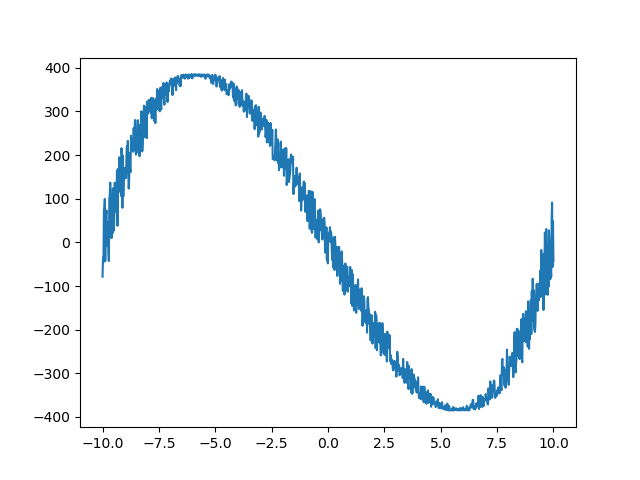

In [6]:
plt.plot(X.T[0], Y)
plt.show()

In [7]:
model = PolynomialRegressor(test_degrees=30, eps=0.01, early_stopping=True, patience=3)

In [8]:
model.fit(XYPair(X, Y), verbose=1)

degree: 0  ||  r_sqaured: 0.0
degree: 1  ||  r_sqaured: 0.6883326144348788
degree: 2  ||  r_sqaured: 0.6883326322929364
degree: 3  ||  r_sqaured: 0.9917323692716178
degree: 4  ||  r_sqaured: 0.991741935469286
degree: 5  ||  r_sqaured: 0.9917521581343278
degree: 6  ||  r_sqaured: 0.9917530116480703
best_degree: 3  ||  best_r_squared: 0.9917323692716178

degree: 3  ||  r_sqaured: 0.9917323692716178


In [9]:
model.degree

3

In [10]:
model.coefs

array([[  5.97478832e-01,  -1.00231873e+02,  -1.04805054e-13,
          1.23878609e-03,   0.00000000e+00,   0.00000000e+00,
          1.00592828e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

In [11]:
model.labels

['1',
 'x0',
 'x1',
 'x0^2',
 'x0*x1',
 'x1^2',
 'x0^3',
 'x0^2*x1',
 'x0*x1^2',
 'x1^3']

In [12]:
model.func

[(0.59747883193534057, '1'),
 (-100.23187294421162, 'x0'),
 (-1.0480505352461478e-13, 'x1'),
 (0.0012387860860059163, 'x0^2'),
 (0.0, 'x0*x1'),
 (0.0, 'x1^2'),
 (1.0059282843647708, 'x0^3'),
 (0.0, 'x0^2*x1'),
 (0.0, 'x0*x1^2'),
 (0.0, 'x1^3')]

In [13]:
model.print_func()

0.597479*1 + -100.231873*x0 + -0.000000*x1 + 0.001239*x0^2 + 0.000000*x0*x1 + 0.000000*x1^2 + 1.005928*x0^3 + 0.000000*x0^2*x1 + 0.000000*x0*x1^2 + 0.000000*x1^3


<IPython.core.display.Javascript object>


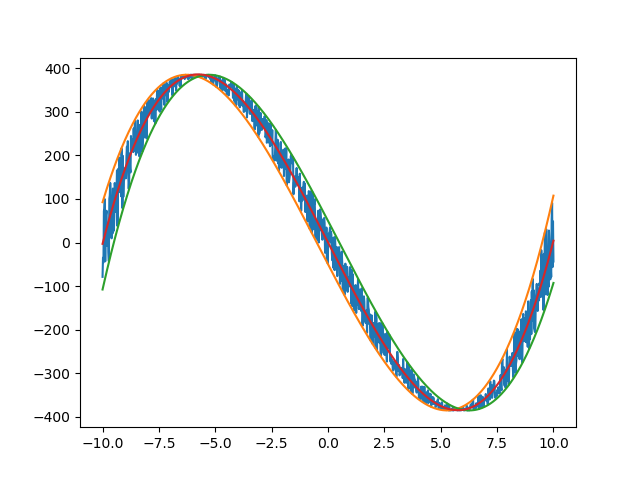

In [14]:
plt.plot(X.T[0], Y)
plt.plot(X.T[0], (X.T[0] + 0.5) * ((X.T[0] + 0.5) - x_dom) * ((X.T[0] + 0.5) + x_dom))
plt.plot(X.T[0], (X.T[0] - 0.5) * ((X.T[0] - 0.5) - x_dom) * ((X.T[0] - 0.5) + x_dom))
plt.plot(X.T[0], model.model.predict(X))
plt.show()